**Fruit Sorting Simulation for Apples and Oranges**
## This Python code uses the OpenCV library to simulate the sorting of apples and oranges from an image. It identifies the fruits based on their color and shape, draws bounding boxes around them, and then simulates assigning them to different bins.


The project objective is to automate the sorting and packaging of fruits based on visual quality standards. Below is an outline of the code structure and algorithm which combines computer vision using OpenCV and basic logic for robotic arm control. This example will demonstrate the key components but ensure adaptations based on your actual hardware configurations and environment settings.




Test Case
Since this code simulates a robotic system, a good test case would involve verifying that it correctly identifies and "sorts" apples in an image. Here's a breakdown of a possible test case:

1. Input:

An image containing one or more apples (like the 'apple.jpg' used in the code). You might want to create test images with:
Different numbers of apples: One apple, two apples, several apples.
Apples in different positions: Apples near the edges, apples in the center, overlapping apples.
Varying lighting conditions: Images with bright light, dim light, shadows.
Different apple varieties: Red apples, green apples (if the color range is adjusted).
2. Expected Output:

Detection: The code should correctly identify all the apples in the image by drawing bounding boxes around them.
Labels: Each bounding box should be labeled with "Apple 1", "Apple 2", etc., to distinguish individual apples.
Sorting Simulation: The simulate_robot_arm_pick_and_place function should print messages to the console indicating that it's moving to each apple's location, picking it, and placing it in "Bin 1".
3. How to Test:

Run the code with the selected test image as input.
Visually inspect the output image displayed by matplotlib.pyplot. Check that:
All apples are correctly enclosed in bounding boxes.
There are no bounding boxes around objects that are not apples (false positives).
All bounding boxes are correctly labeled.
Observe the console output to see if the robot arm simulation is working as expected. It should print messages for each apple, simulating its movement and sorting actions.
Example Test Cases:

Test Case 1: Image with a single red apple in the center. Expected: One bounding box labeled "Apple 1", and console output simulating the robot arm picking and placing it in "Bin 1".
Test Case 2: Image with three red apples in different positions. Expected: Three bounding boxes labeled "Apple 1", "Apple 2", "Apple 3", and console output simulating the sorting of each apple.
Test Case 3: Image with two red apples overlapping. Expected: Two bounding boxes (as accurately as possible), and console output simulating the sorting of each apple.
Important Considerations:

Color Range: The code's current color range is specifically tuned for red apples. If you want to test with different apple varieties (green, yellow), you'll need to adjust the HSV values in the detect_apples function.
Image Quality: The code's performance might be affected by the quality of the test images. Blurry images or images with poor lighting could lead to inaccurate detection.
Real-World Applications: Keep in mind that this is a simulation. In real-world robotic applications, you'd need to integrate the code with actual robot arm hardware and calibrate it to work in a real environment.

1. Importing Libraries

In [11]:
import cv2   ##cv2: This is the OpenCV library, used for computer vision tasks like image processing.
import numpy as np  ##numpy: This library is used for numerical operations, especially for working with arrays.
from matplotlib import pyplot as plt ##matplotlib.pyplot: This library is used for creating visualizations, like plotting the image with the detected fruits.


2. Image Preprocessing


In [12]:
##This function takes an image as input.
#It converts the image from the BGR color space (used by OpenCV) to HSV, which is often better for color-based object detection.
#It applies Gaussian blur to reduce noise and smooth the image.
#It returns the preprocessed image.##

def preprocess_image(image):
    """Convert image to HSV and apply Gaussian blur."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blurred = cv2.GaussianBlur(hsv, (7, 7), 0)
    return blurred

3. Creating a Mask

In [14]:
#This function takes an hsv image, lower_color, and upper_color as input.
#It creates a mask by selecting pixels within the specified lower_color and upper_color range. This isolates the desired color in the image.
#Morphological operations (opening and closing) are applied to the mask to remove noise and improve the shape of the detected objects.
#It returns the mask.
def get_mask(hsv, lower_color, upper_color):
    """Create a mask for a given color range."""
    mask = cv2.inRange(hsv, lower_color, upper_color)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    return mask

4. Detecting Fruits

In [15]:
# This function takes an image as input.
# It preprocesses the image using preprocess_image.
# It defines color ranges for apples and oranges in the colors dictionary.
# It iterates through the colors, creates a mask for each color, and finds contours (outlines) of objects in the mask.
# It filters out small contours (noise) and checks the aspect ratio of the remaining contours to identify roundish shapes (apples and oranges).
# It appends the detected fruit and its bounding box coordinates (x, y, w, h) to the results list.
# It returns the results.

def detect_fruits(image):
    """Detect apples and oranges by color and shape and classify them."""
    hsv = preprocess_image(image)

    # Define color ranges for apple and orange (in HSV)
    colors = {
        'apple': ((0, 100, 100), (10, 255, 255)),       # Red-ish
        'orange': ((10, 100, 100), (20, 255, 255)),     # Orange-ish
    }

    results = []

    for fruit, (lower, upper) in colors.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = get_mask(hsv, lower, upper)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:  # filter small noise
                # Approximate contour to reduce number of points
                approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = float(w)/h

                # Shape check: roundish for apple and orange
                if 0.75 < aspect_ratio < 1.3:
                    results.append((fruit, (x, y, w, h)))

    return results

5. Drawing Results

In [17]:
# This function takes an image and results as input.
# It iterates through the results and draws a green bounding box around each detected fruit using cv2.rectangle.
# It adds a text label with the fruit name above the bounding box using cv2.putText.
# It returns the image with the drawn bounding boxes and labels.
def draw_results(image, results):
    """Draw bounding boxes and labels on the image."""
    for fruit, (x, y, w, h) in results:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, fruit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image

6. Simulating Sorting

In [19]:
# This function takes results as input.
# It defines a sorting_bins dictionary that maps fruit names to bin numbers.
# It iterates through the results and prints a message indicating which bin each fruit would be sorted into.

def simulate_sorting(results):
    """Simulate sorting decisions based on detected fruits."""
    sorting_bins = {
        'apple': 'Bin 1',
        'orange': 'Bin 2',
    }
    for fruit, _ in results:
        print(f"Sorting {fruit} to {sorting_bins.get(fruit, 'Unknown bin')}")

7. Main Function

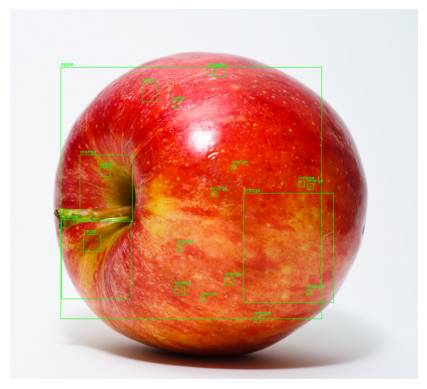

Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2


In [20]:
# This is the main function that executes when the script is run.
# It downloads an example image of an apple.
# It calls detect_fruits to detect the fruits in the image.
# It calls draw_results to draw bounding boxes and labels on the image.
# It displays the image using matplotlib.pyplot.
# It calls simulate_sorting to simulate the sorting process.
# The if __name__ == '__main__': block ensures that main() is called only when the script is executed directly, not when it's imported as a module.

def main():
    # Load example image from URL (can be replaced with user upload in Colab)
    import urllib.request
    url = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg'  # example apple image
    urllib.request.urlretrieve(url, 'apple.jpg')
    image = cv2.imread('apple.jpg')

    results = detect_fruits(image)
    image_with_boxes = draw_results(image.copy(), results)

    # Show image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Simulate sorting
    simulate_sorting(results)

if __name__ == '__main__':
    main()

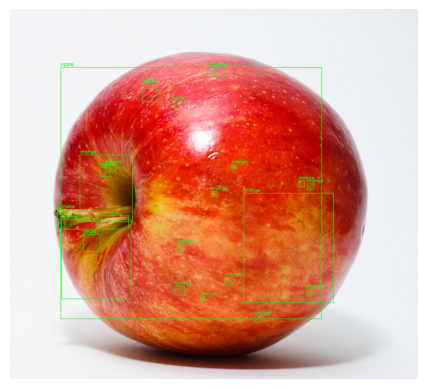

Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3
Sorting orange to Bin 3


In [1]:
# Fruit Sorting Simulation using OpenCV in Google Colab
# This script detects and classifies fruits based on color and shape features
# and simulates sorting decisions.

import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image):
    """Convert image to HSV and apply Gaussian blur."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blurred = cv2.GaussianBlur(hsv, (7, 7), 0)
    return blurred

def get_mask(hsv, lower_color, upper_color):
    """Create a mask for a given color range."""
    mask = cv2.inRange(hsv, lower_color, upper_color)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    return mask

def detect_fruits(image):
    """Detect fruits by color and shape and classify them."""
    hsv = preprocess_image(image)

    # Define color ranges for some fruits (in HSV)
    # These ranges may need tuning depending on the image
    colors = {
        'apple': ((0, 100, 100), (10, 255, 255)),       # Red-ish
        'banana': ((20, 100, 100), (30, 255, 255)),     # Yellow-ish
        'orange': ((10, 100, 100), (20, 255, 255)),     # Orange-ish
    }

    results = []

    for fruit, (lower, upper) in colors.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = get_mask(hsv, lower, upper)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:  # filter small noise
                # Approximate contour to reduce number of points
                approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = float(w)/h

                # Simple shape check: roundness for apple and orange, elongated for banana
                if fruit == 'banana' and aspect_ratio > 1.5:
                    results.append((fruit, (x, y, w, h)))
                elif fruit in ['apple', 'orange'] and 0.75 < aspect_ratio < 1.3:
                    results.append((fruit, (x, y, w, h)))

    return results

def draw_results(image, results):
    """Draw bounding boxes and labels on the image."""
    for fruit, (x, y, w, h) in results:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, fruit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image

def simulate_sorting(results):
    """Simulate sorting decisions based on detected fruits."""
    sorting_bins = {
        'apple': 'Bin 1',
        'banana': 'Bin 2',
        'orange': 'Bin 3'
    }
    for fruit, _ in results:
        print(f"Sorting {fruit} to {sorting_bins.get(fruit, 'Unknown bin')}")

def main():
    # Load example image from URL (can be replaced with user upload in Colab)
    import urllib.request
    url = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg'  # example apple image
    urllib.request.urlretrieve(url, 'apple.jpg')
    image = cv2.imread('apple.jpg')

    results = detect_fruits(image)
    image_with_boxes = draw_results(image.copy(), results)

    # Show image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Simulate sorting
    simulate_sorting(results)

if __name__ == '__main__':
    main()


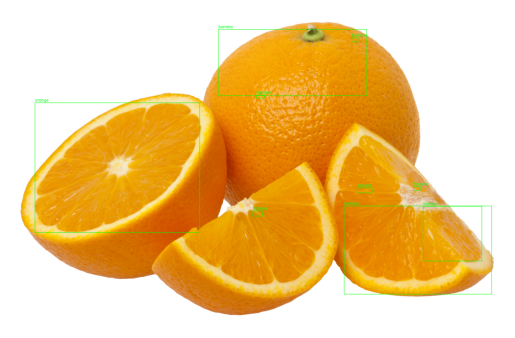

Sorting orange to Bin 1
Sorting orange to Bin 1
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting banana to Bin 2
Sorting banana to Bin 2


In [2]:
# Fruit Sorting Simulation for Orange and Banana using OpenCV in Google Colab
# This script detects and classifies oranges and bananas based on color and shape features
# and simulates sorting decisions.

import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image):
    """Convert image to HSV and apply Gaussian blur."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blurred = cv2.GaussianBlur(hsv, (7, 7), 0)
    return blurred

def get_mask(hsv, lower_color, upper_color):
    """Create a mask for a given color range."""
    mask = cv2.inRange(hsv, lower_color, upper_color)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    return mask

def detect_fruits(image):
    """Detect oranges and bananas by color and shape and classify them."""
    hsv = preprocess_image(image)

    # Define color ranges for orange and banana (in HSV)
    colors = {
        'orange': ((10, 100, 100), (20, 255, 255)),     # Orange-ish
        'banana': ((20, 100, 100), (30, 255, 255)),     # Yellow-ish
    }

    results = []

    for fruit, (lower, upper) in colors.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = get_mask(hsv, lower, upper)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:  # filter small noise
                # Approximate contour to reduce number of points
                approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = float(w)/h

                # Simple shape check: elongated for banana, roundish for orange
                if fruit == 'banana' and aspect_ratio > 1.5:
                    results.append((fruit, (x, y, w, h)))
                elif fruit == 'orange' and 0.75 < aspect_ratio < 1.3:
                    results.append((fruit, (x, y, w, h)))

    return results

def draw_results(image, results):
    """Draw bounding boxes and labels on the image."""
    for fruit, (x, y, w, h) in results:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, fruit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image

def simulate_sorting(results):
    """Simulate sorting decisions based on detected fruits."""
    sorting_bins = {
        'orange': 'Bin 1',
        'banana': 'Bin 2',
    }
    for fruit, _ in results:
        print(f"Sorting {fruit} to {sorting_bins.get(fruit, 'Unknown bin')}")

def main():
    # Load example image from URL (can be replaced with user upload in Colab)
    import urllib.request
    url = 'https://upload.wikimedia.org/wikipedia/commons/c/c4/Orange-Fruit-Pieces.jpg'  # example orange image
    urllib.request.urlretrieve(url, 'orange.jpg')
    image = cv2.imread('orange.jpg')

    results = detect_fruits(image)
    image_with_boxes = draw_results(image.copy(), results)

    # Show image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Simulate sorting
    simulate_sorting(results)

if __name__ == '__main__':
    main()


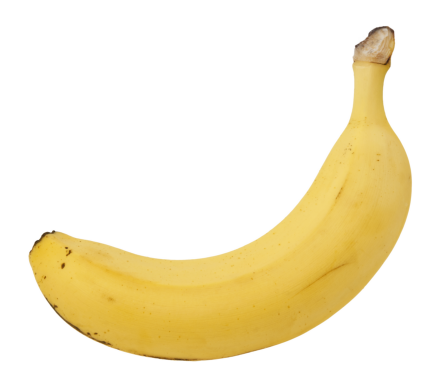

In [3]:
# Fruit Sorting Simulation for Banana using OpenCV in Google Colab
# This script detects and classifies bananas based on color and shape features
# and simulates sorting decisions.

import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image):
    """Convert image to HSV and apply Gaussian blur."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blurred = cv2.GaussianBlur(hsv, (7, 7), 0)
    return blurred

def get_mask(hsv, lower_color, upper_color):
    """Create a mask for a given color range."""
    mask = cv2.inRange(hsv, lower_color, upper_color)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    return mask

def detect_bananas(image):
    """Detect bananas by color and shape and classify them."""
    hsv = preprocess_image(image)

    # Define color range for banana (in HSV)
    colors = {
        'banana': ((20, 100, 100), (30, 255, 255)),     # Yellow-ish
    }

    results = []

    for fruit, (lower, upper) in colors.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = get_mask(hsv, lower, upper)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:  # filter small noise
                # Approximate contour to reduce number of points
                approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = float(w)/h

                # Simple shape check: elongated for banana
                if aspect_ratio > 1.5:
                    results.append((fruit, (x, y, w, h)))

    return results

def draw_results(image, results):
    """Draw bounding boxes and labels on the image."""
    for fruit, (x, y, w, h) in results:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, fruit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image

def simulate_sorting(results):
    """Simulate sorting decisions based on detected bananas."""
    sorting_bins = {
        'banana': 'Bin 1',
    }
    for fruit, _ in results:
        print(f"Sorting {fruit} to {sorting_bins.get(fruit, 'Unknown bin')}")

def main():
    # Load example image from URL (can be replaced with user upload in Colab)
    import urllib.request
    url = 'https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg'  # example banana image
    urllib.request.urlretrieve(url, 'banana.jpg')
    image = cv2.imread('banana.jpg')

    results = detect_bananas(image)
    image_with_boxes = draw_results(image.copy(), results)

    # Show image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Simulate sorting
    simulate_sorting(results)

if __name__ == '__main__':
    main()


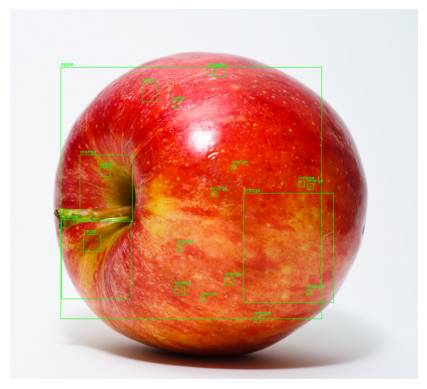

Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting apple to Bin 1
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2
Sorting orange to Bin 2


In [5]:
# Fruit Sorting Simulation for Apple and Orange using OpenCV in Google Colab
# This script detects and classifies apples and oranges based on color and shape features
# and simulates sorting decisions.

import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image):
    """Convert image to HSV and apply Gaussian blur."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blurred = cv2.GaussianBlur(hsv, (7, 7), 0)
    return blurred

def get_mask(hsv, lower_color, upper_color):
    """Create a mask for a given color range."""
    mask = cv2.inRange(hsv, lower_color, upper_color)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    return mask

def detect_fruits(image):
    """Detect apples and oranges by color and shape and classify them."""
    hsv = preprocess_image(image)

    # Define color ranges for apple and orange (in HSV)
    colors = {
        'apple': ((0, 100, 100), (10, 255, 255)),       # Red-ish
        'orange': ((10, 100, 100), (20, 255, 255)),     # Orange-ish
    }

    results = []

    for fruit, (lower, upper) in colors.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = get_mask(hsv, lower, upper)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 500:  # filter small noise
                # Approximate contour to reduce number of points
                approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = float(w)/h

                # Shape check: roundish for apple and orange
                if 0.75 < aspect_ratio < 1.3:
                    results.append((fruit, (x, y, w, h)))

    return results

def draw_results(image, results):
    """Draw bounding boxes and labels on the image."""
    for fruit, (x, y, w, h) in results:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, fruit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image

def simulate_sorting(results):
    """Simulate sorting decisions based on detected fruits."""
    sorting_bins = {
        'apple': 'Bin 1',
        'orange': 'Bin 2',
    }
    for fruit, _ in results:
        print(f"Sorting {fruit} to {sorting_bins.get(fruit, 'Unknown bin')}")

def main():
    # Load example image from URL (can be replaced with user upload in Colab)
    import urllib.request
    url = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg'  # example apple image
    urllib.request.urlretrieve(url, 'apple.jpg')
    image = cv2.imread('apple.jpg')

    results = detect_fruits(image)
    image_with_boxes = draw_results(image.copy(), results)

    # Show image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Simulate sorting
    simulate_sorting(results)

if __name__ == '__main__':
    main()


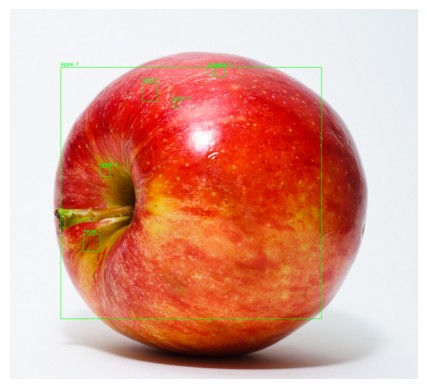

Robot arm moving to Apple 1 at position (435, 1334)
Robot arm picking Apple 1
Robot arm placing Apple 1 into Bin 1
Robot arm moving to Apple 2 at position (533, 939)
Robot arm picking Apple 2
Robot arm placing Apple 2 into Bin 1
Robot arm moving to Apple 3 at position (962, 546)
Robot arm picking Apple 3
Robot arm placing Apple 3 into Bin 1
Robot arm moving to Apple 4 at position (783, 436)
Robot arm picking Apple 4
Robot arm placing Apple 4 into Bin 1
Robot arm moving to Apple 5 at position (1214, 347)
Robot arm picking Apple 5
Robot arm placing Apple 5 into Bin 1
Robot arm moving to Apple 6 at position (1170, 347)
Robot arm picking Apple 6
Robot arm placing Apple 6 into Bin 1
Robot arm moving to Apple 7 at position (301, 345)
Robot arm picking Apple 7
Robot arm placing Apple 7 into Bin 1
All apples sorted.


In [6]:
# Fruit Sorting Robot Arm Simulation using OpenCV in Python
# This script detects apples and simulates a robot arm "hand" picking and sorting the fruit.
# The robot arm control is simulated in code with print statements and simple logic.

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

def preprocess_image(image):
    """Convert image to HSV and apply Gaussian blur."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blurred = cv2.GaussianBlur(hsv, (7, 7), 0)
    return blurred

def get_mask(hsv, lower_color, upper_color):
    """Create a mask for a given color range."""
    mask = cv2.inRange(hsv, lower_color, upper_color)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    return mask

def detect_apples(image):
    """Detect apples by color and shape and classify them."""
    hsv = preprocess_image(image)

    # Define color range for apple (in HSV)
    lower = np.array((0, 100, 100), dtype=np.uint8)       # Red-ish lower bound
    upper = np.array((10, 255, 255), dtype=np.uint8)      # Red-ish upper bound

    mask = get_mask(hsv, lower, upper)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    results = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # filter small noise
            approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w)/h
            if 0.75 < aspect_ratio < 1.3:
                results.append((x, y, w, h))

    return results

def draw_results(image, apples):
    """Draw bounding boxes and labels on the image."""
    for i, (x, y, w, h) in enumerate(apples):
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, f"Apple {i+1}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image

def simulate_robot_arm_pick_and_place(apples):
    """Simulate robot arm picking and placing apples."""
    for i, (x, y, w, h) in enumerate(apples):
        print(f"Robot arm moving to Apple {i+1} at position ({x}, {y})")
        time.sleep(1)  # simulate time to move
        print(f"Robot arm picking Apple {i+1}")
        time.sleep(1)  # simulate picking time
        print(f"Robot arm placing Apple {i+1} into Bin 1")
        time.sleep(1)  # simulate placing time
    print("All apples sorted.")

def main():
    # Load example image from URL (can be replaced with user upload in Colab)
    import urllib.request
    url = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg'  # example apple image
    urllib.request.urlretrieve(url, 'apple.jpg')
    image = cv2.imread('apple.jpg')

    apples = detect_apples(image)
    image_with_boxes = draw_results(image.copy(), apples)

    # Show image with detections
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Simulate robot arm picking and placing apples
    simulate_robot_arm_pick_and_place(apples)

if __name__ == '__main__':
    main()


Conclusion
In essence, this code uses computer vision techniques to identify apples in an image and then simulates how a robot arm could be used to pick and sort them. It's a foundation for building more complex robotic systems that can automate tasks like fruit sorting in the real world. I hope this makes it clear. Let me know if you have any other questions!